In [1]:
import pandas as pd
from function import process_df, metrics_to_dataframe, plot_actual_vs_predicted

data = pd.read_csv('data/pureMS2_pearson.csv')

data_1 = data.drop(['M', 'CationNo', 'AnionNo'], axis=1)
data

,EN,CR,MorphoNo,SSA,M,CationNo,AnionNo,CD,Cs
0,1.96,1.39,4,64.80,2.0,1,1,1.0,431.82
1,1.96,1.39,4,64.80,2.0,1,1,2.0,398.88
2,1.96,1.39,4,64.80,2.0,1,1,3.0,312.18
3,1.96,1.39,4,64.80,2.0,1,1,5.0,272.00
4,1.96,1.39,4,64.80,2.0,1,1,7.0,230.70
...,...,...,...,...,...,...,...,...,...
240,2.16,1.30,2,6.64,1.0,2,2,0.6,85.40
241,2.16,1.30,2,6.64,1.0,2,2,0.7,75.30
242,2.16,1.30,2,6.64,1.0,2,2,1.0,34.60
243,2.16,1.30,4,58.20,2.0,1,1,1.0,116.80


In [2]:
# Define the function to categorize 'Cs' values into classes A, B, C, D, E
def categorize_cs(value):
    if value < 100:
        return 0
    elif 100 <= value < 200:
        return 1
    elif 200 <= value < 500:
        return 2
    else:
        return 3

# Apply the function to the 'Cs' column and create a new column 'Cs_class'
data['Cs_class'] = data['Cs'].apply(categorize_cs)

# Display the first few rows to confirm the new column
data

,EN,CR,MorphoNo,SSA,M,CationNo,AnionNo,CD,Cs,Cs_class
0,1.96,1.39,4,64.80,2.0,1,1,1.0,431.82,2
1,1.96,1.39,4,64.80,2.0,1,1,2.0,398.88,2
2,1.96,1.39,4,64.80,2.0,1,1,3.0,312.18,2
3,1.96,1.39,4,64.80,2.0,1,1,5.0,272.00,2
4,1.96,1.39,4,64.80,2.0,1,1,7.0,230.70,2
...,...,...,...,...,...,...,...,...,...,...
240,2.16,1.30,2,6.64,1.0,2,2,0.6,85.40,0
241,2.16,1.30,2,6.64,1.0,2,2,0.7,75.30,0
242,2.16,1.30,2,6.64,1.0,2,2,1.0,34.60,0
243,2.16,1.30,4,58.20,2.0,1,1,1.0,116.80,1


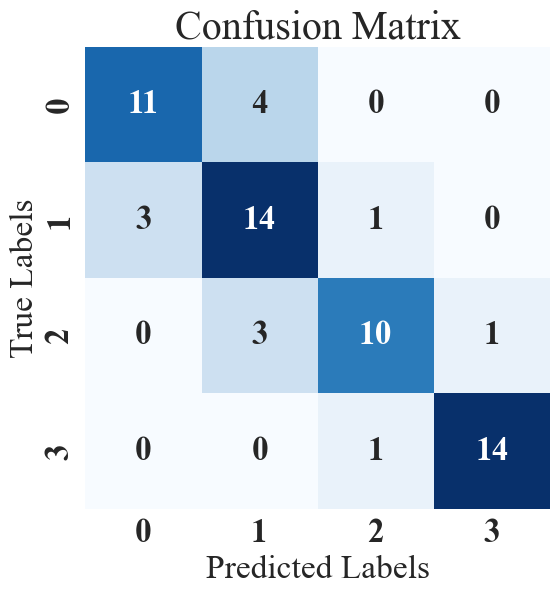

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.67      0.78      0.72        18
           2       0.83      0.71      0.77        14
           3       0.93      0.93      0.93        15

    accuracy                           0.79        62
   macro avg       0.80      0.79      0.79        62
weighted avg       0.80      0.79      0.79        62



In [3]:
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


X = data.drop(['Cs', 'Cs_class'], axis=1)
y = data['Cs_class']
# Split the data into training and testing sets in an 80:20 ratio, stratified by 'Cs_class'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=data['Cs_class'], random_state=42)


# 训练模型
xgb = xgboost.XGBClassifier(n_estimators=100,
                            learning_rate=0.2,
                            random_state=21)

xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)


cm = confusion_matrix(y_test, y_test_pred)
# 绘制混淆矩阵
plt.rcParams.update({
        'font.family': 'Times New Roman',
        'font.size': 24,
        'font.weight': 'bold',
        'figure.figsize': (6, 6)  # 设置图像尺寸为10x10英寸
    })
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(classification_report(y_test, y_test_pred))

In [4]:
# Define the function to categorize 'Cs' values into classes A, B, C, D, E
def categorize_cs(value):
    if value < 100:
        return 0
    elif 100 <= value < 200:
        return 1
    elif 200 <= value < 500:
        return 2
    else:
        return 3

# Apply the function to the 'Cs' column and create a new column 'Cs_class'
data_1['Cs_class'] = data_1['Cs'].apply(categorize_cs)


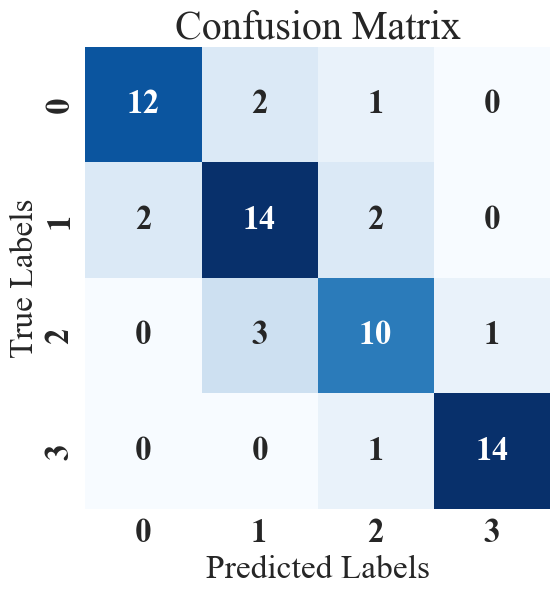

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.74      0.78      0.76        18
           2       0.71      0.71      0.71        14
           3       0.93      0.93      0.93        15

    accuracy                           0.81        62
   macro avg       0.81      0.81      0.81        62
weighted avg       0.81      0.81      0.81        62



In [5]:
X = data_1.drop(['Cs', 'Cs_class'], axis=1)
y = data_1['Cs_class']
# Split the data into training and testing sets in an 80:20 ratio, stratified by 'Cs_class'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=data_1['Cs_class'], random_state=42)


# 训练模型
xgb = xgboost.XGBClassifier(n_estimators=100,
                            learning_rate=0.2,
                            random_state=21)

xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)


cm = confusion_matrix(y_test, y_test_pred)
# 绘制混淆矩阵
plt.rcParams.update({
        'font.family': 'Times New Roman',
        'font.size': 24,
        'font.weight': 'bold',
        'figure.figsize': (6, 6)  # 设置图像尺寸为10x10英寸
    })
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(classification_report(y_test, y_test_pred))